# **Brief 5 - Reconnaissance écriture manuelle**
# Régression logistique - descente de gradien  

keywords: numpy, scikit-learn, logistic regression, descente de gradient, optimisation.

## **0) Description**  

Mr Pontier is back and needs your help. This times, he needs to automatically detect hand-written digits written on pictures that represents the phone numbers of his clients and collaborators.
Because he has thousands of documents, this will take far too long to do it manually. This is why he asked you if you can design an algorithm that automatically detect the number from the pictures.

Furthermore, Mr Pontier wants
* to understand how the algorithm works,
* to compare the performance with several classification algorithms 
* to observe the convergence of a grandient descent algorithm for further investigation.

Mr Pontier is back and needs your help. This times, he needs to automatically detect hand-written digits written on pictures that represents the phone numbers of his clients and collaborators. Because he has thousands of documents, this will take far too long to do it manually. This is why he asked you if you can design an algorithm that automatically detect the number from the pictures.

## **1) Get and understand your data**  
### a) What is the type of the data ?  
Chaques images est une matrice de 8 x 8. Les éléments de la matrice sont des nombres flotants codant la
couleurs, ou le niveau de gris, avec lequel l'élèment est affichée. Chaque image à 64 pixels.
Chaque image représente un chiffre de 0 à 9 écrit sous forme manuscrite. Il y a 1797 images.

In [1]:
import numpy as np
import pandas as pd

import random

from sklearn.datasets import load_digits
#import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt 

# Importation des data
digits = load_digits()

print("Le jeux de données comprend {} enregistrements.\nChaque enregistrement est une matrices de {}"\
      " éléments.\n".format(digits.data.shape[0],digits.data.shape[1]))
print("Étiquettes du jeux de données (les 100 premières):\n",digits.target[:100])

Le jeux de données comprend 1797 enregistrements.
Chaque enregistrement est une matrices de 64 éléments.

Étiquettes du jeux de données (les 100 premières):
 [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1]


A l'indice 1149, le chiffre est 8


<Figure size 432x288 with 0 Axes>

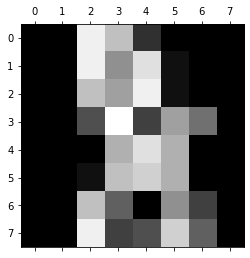

In [2]:
# Choisir une image aléatoirement et l'afficher
ind= random.randint(0, digits.data.shape[0] - 1)
print(f"A l'indice {ind}, le chiffre est {digits.target[ind]}")

plt.gray() 
plt.matshow(digits.images[ind]) 
plt.show()

### b) étude de matshow

<Figure size 432x288 with 0 Axes>

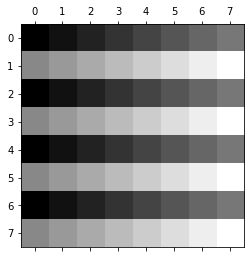

In [3]:
plt.gray() 
a=[[0.,1.,2.,3.,4.,5.,6.,7.], [8.,9.,10.,11.,12.,13.,14.,15.], [0.,1.,2.,3.,4.,5.,6.,7.],\
   [8.,9.,10.,11.,12.,13.,14.,15.],[0.,1.,2.,3.,4.,5.,6.,7.], [8.,9.,10.,11.,12.,13.,14.,15.], \
   [0.,1.,2.,3.,4.,5.,6.,7.],[8.,9.,10.,11.,12.,13.,14.,15.]]
plt.matshow(np.array(a)) 
plt.show()
# matshow s'adapte au valeurs qui sont des float, et créer une échelle. La plus grande des valeurs ressort
#  en blanc la plus faible en noir


### c) Montrer plusieurs exemples d'écriture pour chaque chiffre 

X Shape: (1797, 8, 8)
Xdata Shape: (1797, 64)
Y shape: (1797,)
digits.target_name: [0 1 2 3 4 5 6 7 8 9]



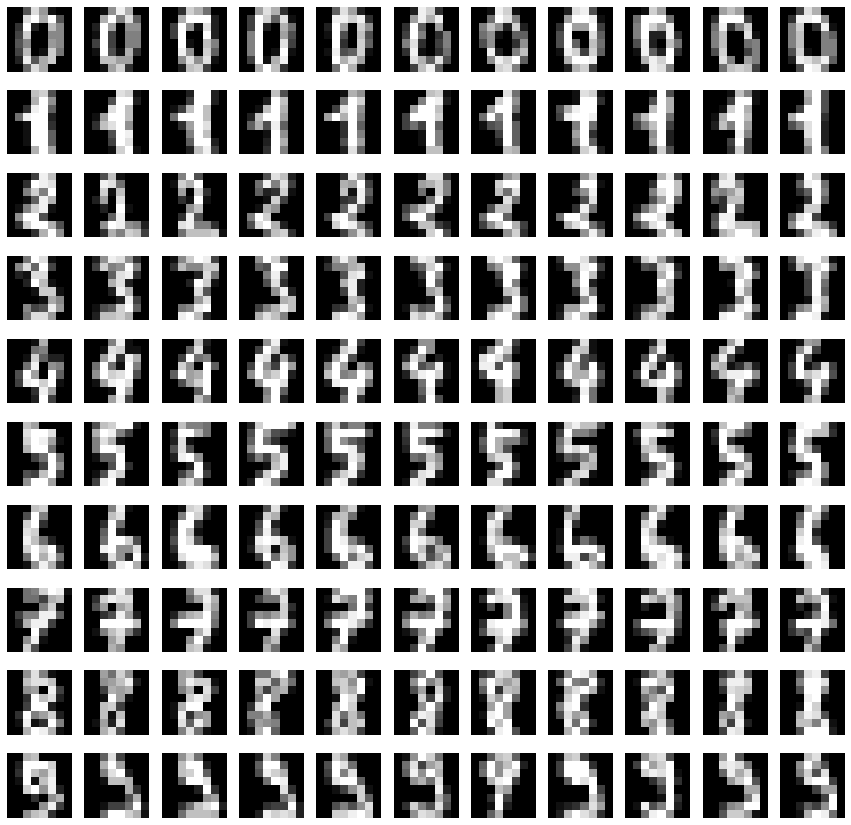

In [4]:
X = digits.images
Y = digits.target
Xdata= digits.data

# Les images sont organisées en matrice de 8x8, les datas sont un tableau de 64 éléments 

n_digits = np.unique(Y) # = 0,1,2,...9
M =11
#dim = int(np.sqrt(X.shape[1]))
print("X Shape:",X.shape)
print("Xdata Shape:",Xdata.shape)
print("Y shape:",Y.shape)
print(f"digits.target_name: {digits.target_names}\n")

# Préparation de l'affichage
fig, axs = plt.subplots(len(n_digits), M, figsize=(15, 15))

# Afficher M exemples de tout les digits (de 0 à 9)
for i, d in enumerate(n_digits):
    for j in range(M):
        #print(X[Y==d][j])
        axs[i,j].imshow(X[Y == d][j]) # permet d'afficher sur une même ligne 'M' image représentant le même chiffre
        axs[i,j].axis('off')


## **2) Prepare your ML algorithm**

How to evaluate classification algorithms ?
* https://scikit-learn.org
* wikipedia
* towards data science
* ...

Write the equation of the **precision** and **recall** score and explicit what each terms represents.  
<span style="color: ##0000FF">
VP/FP vrai/faux positif    
VN/FN vrai/faux négatif  
precision = VP(VP+FP)  
rappel= VP/(VP+FN)  
https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel  
</span>    
  
explain the purpose of the training set ?  
<span style="color: ##0000FF">
jeux d'entrainement pour apprentissage.  
</span>  
explain the purpose of the testing set ?  
<!--* the randomization of the data ?-->
<span style="color: #0000FF">
permet de vérifier si l'apprentissage permet de prédire sur des données "nouvelles"
</span>  


What does the `train_test_split` function in sklearn do ?  
<span style="color: #0000FF">
Cette fonction permet de séparer un jeux de donnée en un jeu de données utiliser pour **l'apprentissage** et un jeux de données pour **tester** l'efficacité de cet apprentissage.
</span>

use the `train_test_split` function of sklearn to build a test set with size that represents 20% of the original dataset (and 80% for the training set).
<span style="color: #0000FF">
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Y, test_size=0.2, random_state=42)
</span>  
  
check that the ratio is correct.  
<span style="color: #0000FF">
Le score obtenu est de 99.72 % de bonne prédictions pour test_size = 0.2. C'est le meilleur taux obtenu. 
</span>  



In [5]:
# On split le jeux de données
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Y, test_size=0.2, random_state= 42)

print("{} données pour l'entrainement, {} données pour le test.".format(len(X_train),len(X_test)))

def labelisation(yt, ytst, n):
    yt= np.array([1 if el== n else 0 for el in yt])
    ytst= np.array([1 if el== n else 0 for el in ytst])
    return yt, ytst

Y_train0, Y_test0= labelisation(Y_train, Y_test, 0)

Y_train1, Y_test1= labelisation(Y_train, Y_test, 1)

Y_train2, Y_test2= labelisation(Y_train, Y_test, 2)

Y_train3, Y_test3= labelisation(Y_train, Y_test, 3)

Y_train4, Y_test4= labelisation(Y_train, Y_test, 4)

Y_train5, Y_test5= labelisation(Y_train, Y_test, 5)

Y_train6, Y_test6= labelisation(Y_train, Y_test, 6)

Y_train7, Y_test7= labelisation(Y_train, Y_test, 7)

Y_train8, Y_test8= labelisation(Y_train, Y_test, 8)

Y_train9, Y_test9= labelisation(Y_train, Y_test, 9)


1437 données pour l'entrainement, 360 données pour le test.


## **3) Predict Digits**

In the dataset we have multiple labels. Therefore, to start we will predict in a binary case. It means that that we will predict only if an image is a given digit (for exemple `7`) or not.

To do so, we will a **logistic regression** algorithm plus (at least) **two** others of your choices. 

Fit the model and show the performance results whithin a table for each models in terms of:
* the **precision** score on the testing set 
* the **recall** score on the testing set
* the inference time for each algorithm

How many input data the algorithms needs the be efficient (and why) ? 

Compare the performance on the training set. What do you observe ?


### Régression logistique pour le chiffre 7

In [6]:
# On construit et on 'fit' le modèle
lregr7 = LogisticRegression(solver='liblinear') # Instance de l'objet LogisticRegression
lregr7.fit(X_train, Y_train7)

# on teste sur les données de.... test :)
predict7 = lregr7.predict(X_test)

print(predict7[:50])
print(Y_test[:50])

# Statistique: accuracy,.....
print("\nLe score obtenu est de {} % de bonne prédictions".format(round(lregr7.score(X_test, Y_test7)*100,2)))
# Quelque valeur obtenu pour la précision (accuracy)
# Le score obtenu est de 99.33 % de bonne prédictions pour test_size=0.33 qq confusion 2 et 7
# Le score obtenu est de 99.44 % de bonne prédictions pour test_size = 0.1 (l'erreur du '2' est corrigée)
# Le score obtenu est de 99.72 % de bonne prédictions pour test_size = 0.2 (l'erreur du '2' est corrigée)
# Le score obtenu est de 99.17 % de bonne prédictions pour test_size = 0.4  qq confusion 2 et 7
# Le score obtenu est de 99.44 % de bonne prédictions pour test_size = 0.5 
# Le score obtenu est de 99.35 % de bonne prédictions pour test_size = 0.6
# Le score obtenu est de 98.73 % de bonne prédictions pour test_size = 0.7 des 7 non détecté
# Le score obtenu est de 99.03 % de bonne prédictions pour test_size = 0.8
# Le score obtenu est de 98.56 % de bonne prédictions pour test_size = 0.85
# Le score obtenu est de 98.52 % de bonne prédictions pour test_size = 0.9
# partager l'échantillon en 2 semble être un bon compromis

print("\n",classification_report(Y_test7,predict7, target_names=["non 7 détecté","7 détecté"]))


[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5]

Le score obtenu est de 99.72 % de bonne prédictions

                precision    recall  f1-score   support

non 7 détecté       1.00      1.00      1.00       326
    7 détecté       1.00      0.97      0.99        34

     accuracy                           1.00       360
    macro avg       1.00      0.99      0.99       360
 weighted avg       1.00      1.00      1.00       360



## **4) Multi-class classification**

Fit now the algorithm in the multiclass case (ie using all the the classes (target)).

Show the result with
* the confusion matrix (see sklearn.metrics.plot_confusion_matrix)
* the classification report (see sklearn.metrics.classification_report)



In [7]:
# On construit et on 'fit' le modèle
lregrall = LogisticRegression(solver='liblinear') # Instance de l'objet LogisticRegression
lregrall.fit(X_train, Y_train)

# on teste sur les données de.... test :)
predictall = lregrall.predict(X_test)

print(predictall[:50])
print(Y_test[:50])

for i in range(len(Y_test)):
    if Y_test[i]!= predictall[i]:
        print(f"Erreur! Un {Y_test[i]} à été interprété comme un {predictall[i]}")
# 1 seul erreur sur les 50 premiers: 8 à la place d'un 9

target_names= ["détection de 0", "détection de 1", "détection de 2", "détection de 3", "détection de 4",
               "détection de 5", "détection de 6", "détection de 7", "détection de 8", "détection de 9"]
print("Le score obtenu est de {} % de bonne prédictions".format(round(lregrall.score(X_test, Y_test)*100,2)))
print("\n",classification_report(Y_test,predictall, target_names=target_names)) #target_names=[""]


[6 9 3 7 2 1 5 2 5 2 1 8 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5]
Erreur! Un 9 à été interprété comme un 8
Erreur! Un 7 à été interprété comme un 9
Erreur! Un 3 à été interprété comme un 5
Erreur! Un 9 à été interprété comme un 8
Erreur! Un 4 à été interprété comme un 6
Erreur! Un 9 à été interprété comme un 8
Erreur! Un 5 à été interprété comme un 2
Erreur! Un 4 à été interprété comme un 1
Erreur! Un 8 à été interprété comme un 5
Erreur! Un 6 à été interprété comme un 5
Erreur! Un 9 à été interprété comme un 8
Erreur! Un 1 à été interprété comme un 8
Erreur! Un 5 à été interprété comme un 6
Erreur! Un 8 à été interprété comme un 1
Le score obtenu est de 96.11 % de bonne prédictions

                 precision    recall  f1-score   support

détection de 0       1.00      1.00      1.00        33
détection de 1       0.93      0.96      0.95        

## **5) Descente de gradient en implémentant un algorithme codé en python**

Observer la convergence en fonction du nombre de passe.
> veille
What algorithm uses sklearn to estimate the model parameters for the logistic regression ?
* What are the keys equations we need to implement the algorithm ?
* what is the difference between the gradient descent and the stochastic gradient descent ?

Write the *pseudo-code* of the algorithm to be sure to understand all the different steps.
https://fr.wikipedia.org/wiki/Pseudo-code

Implement the gradient descent for the logistic regression.


Show the convergence of the performance results with two graphics:
* the **precision** score on testing set AND training set 
* the **recall** score on testing set AND training set 


What is the impact of the learning rate on the convergence ?
What difference do you observe on the results between the training set and testing set


### a) fonctions utilisées pour la classification

In [8]:
def model_rl_JP(X= None, theta= None):
    z= np.dot(X, theta)
    sig=  1/(1+np.exp(-z))
    return sig

def fonction_cout(X= None, y= None, theta= None, bavard= True):
    m = X.shape[0]
    h = model_rl_JP(X= X, theta= theta)
    
    mat= y*np.log(h) + (1-y)*np.log(1-h)
    cout= -(1/m) * np.sum(mat)

    if bavard: print(f"fonction_cout: cout: {cout}")

    return cout

def gradient(X= None, y= None, theta= None):
    m = X.shape[0]
    h = model_rl_JP(X= X, theta= theta)
    grad= (1/m) * np.dot(X.T, (h-y))

    return grad


def descente_gradient(X= None, y= None, theta= None, learning_rate= 0.01, n_iterations= 100, bavard= False):
    historique = np.zeros(n_iterations) 

    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X= X, y= y, theta= theta) # mise a jour du parametre theta (formule du gradient descent)
        historique[i] = fonction_cout(X= X, y= y, theta= theta, bavard= bavard) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, historique

def predict(prediction= None):
    pred = []
    for i in prediction:
        if i>=0.5:pred.append(1)
        else: pred.append(0)
    return pred

def precision(prediction= None, reel= None):
    accuracy= 0
    for i in range(0, len(prediction)):
        if prediction[i] == reel[i]:
            accuracy += 1
    return accuracy/len(reel)


### b) Fabrication du jeu de données

In [9]:
# On fabrique une colonne de un pour le 'biais'
un= np.ones(X_train.shape[0])

# On agrége les 2 colonnes
Xbiais= np.c_[X_train,un]

# On choisi un algo de mise à l'échelle
#scaler= StandardScaler(with_mean= True, with_std= False)
scaler= StandardScaler()
#scaler= RobustScaler()
#scaler= MinMaxScaler()

# Pour la normalisation il faut prendre la matrice transposé car les features sont organisées en colonnes. Feature 1= pixel 1
#  de toute les images, feature2= pixel 2 de toute les images,.....
# Il font donc retransposé la matrice pour retrouvé la matrice originelle standardisé.
Xbiais= scaler.fit_transform(Xbiais.T)
Xbiais= Xbiais.T

print(Xbiais.min(), Xbiais.max(),Xbiais.shape)
print(X_train.min(), X_train.max(),  X_train.shape)

-1.0085795885216282 2.4637448955818937 (1437, 65)
0.0 16.0 (1437, 64)


### c) Apprentissage du modèle

In [10]:
# On fabrique theta (on pourrais prendre une autre valeur pour l'initialisation)
theta= np.ones((Xbiais.shape[1],1))

# On lance la descente de gradient
learning_rate= 5
n_iterations= 2000
theta_final, hist= descente_gradient(X= Xbiais, y= Y_train7.reshape(-1,1), theta= theta,
                                     learning_rate= learning_rate, n_iterations= n_iterations, bavard= False)

### d) On vérifie que la descente de gradient se soit correctement passé

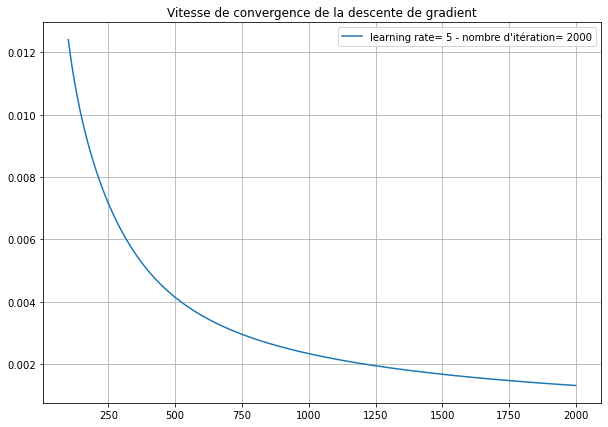

In [11]:
debut, fin= 100, n_iterations

plt.figure(figsize=(10,7))
plt.plot(range(debut, fin), hist[debut:fin], label=f"learning rate= {learning_rate} - "\
        f"nombre d'itération= {n_iterations}")
plt.title("Vitesse de convergence de la descente de gradient")
plt.legend()
plt.grid()

plt.show()

### e) Résultat du modèle sans utilisation de sklearn sur le jeux d'entrainement

In [12]:
mod = model_rl_JP(theta= theta_final, X= Xbiais)

y_pred = predict(prediction= mod)

accuracy = precision(prediction= y_pred, reel= Y_train7)

#print(f"theta init: {theta.T}")
print(f"theta: {theta_final.T}")
print(f"\nprécision= {100 * accuracy}%\tlearning_rate= {learning_rate}\tn_iterations= {n_iterations}")


theta: [[ 1.78763881  0.66763637  1.26110745  1.59770382  0.96682075  2.31012623
   1.93620042  2.52623083  1.78535944  0.84944986  1.22820836 -0.37710565
   5.92373297  0.79567618  0.14791719  2.50913803  1.78619052 -1.05527602
  -1.17373763 -1.08730382 -0.73044155  1.55553923  2.67168761  1.70659626
   1.78707972 -1.95713433  0.60336544 -1.13097636  0.99578323  1.06025356
   2.42872516  1.68550114  1.78763881  3.36272563  0.06236591  1.62463933
   1.09640337  1.86694941  3.55652674  1.78763881  1.77571909 -1.3251185
   1.50382703  1.76202316  2.01973591  2.41009582  1.17385773  1.77473987
   1.78078271  0.73845886  2.20037727  1.5130579  -2.99877356 -3.81297444
   0.01953515  1.70423529  1.78734533  0.26904212 -0.3131452   0.72732148
  -1.13886633 -2.62076343  0.61974751  1.62384103  1.59931697]]

précision= 100.0%	learning_rate= 5	n_iterations= 2000


### e) Résultat du modèle sans utilisation de sklearn sur le jeux de test

In [13]:
# On fabrique une colonne de un pour le 'biais'
un= np.ones(X_test.shape[0])

# On agrége les 2 colonnes
Xbiais_test= np.c_[X_test,un]

Xbiais_test= scaler.fit_transform(Xbiais_test.T)
Xbiais_test= Xbiais_test.T

modtest = model_rl_JP(theta= theta_final, X= Xbiais_test)

y_predtest = predict(prediction= modtest)


In [14]:
VP, VN, FN, FP= 0, 0, 0, 0
for i in range(len(Y_test)):
    if Y_test7[i]== 1 and y_predtest[i]== 1:
        #print(f"\t7 correctement détecté !")
        VP+= 1
    elif Y_test7[i]== 1 and y_predtest[i]== 0:
        #print(f"7 non détecté !")
        VN+= 1
    elif Y_test7[i]== 0 and y_predtest[i]== 0:
        #print(f"7 non détecté !")
        FN+= 1
    elif Y_test7[i]== 0 and y_predtest[i]== 1:
        #print(f"7 non détecté !")
        FP+= 1
        
    else:
        print("Que fait on ici ???")
print(f"{VP} '7' correctement détecté\n{VN} '7' non détecté\n{FN} nombre # '7' et détecté # '7'"\
      f"\n{FP} nombre # '7' détecté comme '7'")
print(f"{VP + FN} détection correcte, {VN + FP} erreur(s)")


33 '7' correctement détecté
1 '7' non détecté
326 nombre # '7' et détecté # '7'
0 nombre # '7' détecté comme '7'
359 détection correcte, 1 erreur(s)


In [15]:
print(classification_report(Y_test7, y_predtest, target_names=["non 7 détecté","7 détecté"]))

               precision    recall  f1-score   support

non 7 détecté       1.00      1.00      1.00       326
    7 détecté       1.00      0.97      0.99        34

     accuracy                           1.00       360
    macro avg       1.00      0.99      0.99       360
 weighted avg       1.00      1.00      1.00       360

